In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
#import pymc3 as pm
import seaborn as sns
import dateutil.parser
import datetime
from datetime import timedelta
from datetime import date
import calendar

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_rows', 500)

In [2]:
# Choose to download(True) or read from file (False)
download = True

if download:
    dates = ['210109','210116','210123' ,'210130','210206','210213' ,'210220','210227','210306','210313']

    Week_data = []
    for wk_date in dates:
        MTA_url = f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{wk_date}.txt"
        Week_data.append(pd.read_csv(MTA_url))
        
    MTA_data = pd.concat(Week_data)
    MTA_data.to_csv('MasterData.csv')
else:
    MasterData = pd.read_csv("MasterData.csv")

In [3]:
# Choose to download(True) or read from file (False)
download = False

if download:
    dates = ['210109','210116','210123' ,'210130','210206','210213' ,'210220','210227','210306','210313']

    Week_data = []
    for wk_date in dates:
        MTA_url = f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{wk_date}.txt"
        Week_data.append(pd.read_csv(MTA_url))
        
    MTA_data = pd.concat(Week_data)
    MTA_data.to_csv('MasterData.csv')
else:
    MasterData = pd.read_csv("MasterData.csv")

In [4]:
MasterData.rename(columns={"C/A": "CA"},inplace=True)
MasterData = MasterData.drop("Unnamed: 0",1)
MasterData.columns = [column.strip() for column in MasterData.columns]
MasterData.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999


In [5]:
MasterData.DATE.value_counts().sort_index()

01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
01/06/2021    30021
01/07/2021    29745
01/08/2021    30417
01/09/2021    29820
01/10/2021    29764
01/11/2021    30393
01/12/2021    30320
01/13/2021    29754
01/14/2021    29927
01/15/2021    29903
01/16/2021    30151
01/17/2021    29792
01/18/2021    29711
01/19/2021    29752
01/20/2021    29698
01/21/2021    29649
01/22/2021    30092
01/23/2021    29986
01/24/2021    29733
01/25/2021    29745
01/26/2021    29939
01/27/2021    29816
01/28/2021    29778
01/29/2021    29918
01/30/2021    29845
01/31/2021    29786
02/01/2021    29971
02/02/2021    29802
02/03/2021    29975
02/04/2021    29773
02/05/2021    29927
02/06/2021    29811
02/07/2021    29747
02/08/2021    29910
02/09/2021    29890
02/10/2021    29869
02/11/2021    29704
02/12/2021    29690
02/13/2021    29784
02/14/2021    29834
02/15/2021    29832
02/16/2021    29938
02/17/2021    29885
02/18/2021    29781
02/19/2021    29990
02/20/2021    29964


In [6]:
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092870 entries, 0 to 2092869
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 175.6+ MB


In [7]:
MasterData.isna().sum()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [8]:
MasterData.shape

(2092870, 11)

In [9]:
MasterData["DATETIME"]= pd.to_datetime(MasterData['DATE'] + ' ' + MasterData['TIME'])

In [10]:
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092870 entries, 0 to 2092869
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   CA        object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 191.6+ MB


In [11]:
MasterData.groupby(["CA", "UNIT", "SCP", "STATION", "DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
1408917,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-01 03:00:00,2
640667,N100,R252,00-00-00,HIGH ST,2021-03-07 07:00:00,2
640680,N100,R252,00-00-00,HIGH ST,2021-03-09 11:00:00,2
640679,N100,R252,00-00-00,HIGH ST,2021-03-09 07:00:00,2
640678,N100,R252,00-00-00,HIGH ST,2021-03-09 03:00:00,2
...,...,...,...,...,...,...
697614,N128,R200,00-05-01,EUCLID AV,2021-01-22 11:00:00,1
697613,N128,R200,00-05-01,EUCLID AV,2021-01-22 07:00:00,1
697612,N128,R200,00-05-01,EUCLID AV,2021-01-22 03:00:00,1
697611,N128,R200,00-05-01,EUCLID AV,2021-01-21 23:00:00,1


In [12]:
MasterData.groupby(["CA", "UNIT", "SCP", "STATION", "DATETIME"]).EXITS.count().reset_index().sort_values("EXITS", ascending=False)

,CA,UNIT,SCP,STATION,DATETIME,EXITS
1408917,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-01 03:00:00,2
640667,N100,R252,00-00-00,HIGH ST,2021-03-07 07:00:00,2
640680,N100,R252,00-00-00,HIGH ST,2021-03-09 11:00:00,2
640679,N100,R252,00-00-00,HIGH ST,2021-03-09 07:00:00,2
640678,N100,R252,00-00-00,HIGH ST,2021-03-09 03:00:00,2
...,...,...,...,...,...,...
697614,N128,R200,00-05-01,EUCLID AV,2021-01-22 11:00:00,1
697613,N128,R200,00-05-01,EUCLID AV,2021-01-22 07:00:00,1
697612,N128,R200,00-05-01,EUCLID AV,2021-01-22 03:00:00,1
697611,N128,R200,00-05-01,EUCLID AV,2021-01-21 23:00:00,1


In [13]:
MasterData.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [14]:
MasterData.groupby(["CA", "UNIT", "SCP", "STATION", "DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False).shape

(2092811, 6)

In [15]:
MasterData.groupby(["CA", "UNIT", "SCP", "STATION", "DATETIME"]).EXITS.count().reset_index().sort_values("EXITS", ascending=False).shape

(2092811, 6)

In [16]:
mta_entries = MasterData.groupby(['STATION','CA','UNIT','SCP', 'DATE']).ENTRIES.max() - MasterData.groupby(['STATION','CA','UNIT','SCP' , 'DATE']).ENTRIES.min()
mta_exits =   MasterData.groupby(['STATION','CA','UNIT','SCP','DATE']).EXITS.max() -   MasterData.groupby(['STATION','CA','UNIT','SCP', 'DATE']).EXITS.min()

## flattens the data
mta_entries_flat = mta_entries.reset_index()
mta_exits_flat = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')
mta_entries_exits["DATE"]= pd.to_datetime(mta_entries_exits['DATE'])

## append weekday and traffic column to dataset
mta_entries_exits['WEEKDAY'] = mta_entries_exits['DATE'].dt.day_name()
mta_entries_exits['TRAFFIC'] = mta_entries_exits['ENTRIES'] + mta_entries_exits['EXITS']
mta_entries_exits['WEEKDAY_INDEX'] = mta_entries_exits['DATE'].dt.weekday

In [17]:
mta_entries_exits.head()

,STATION,CA,UNIT,SCP,DATE,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
0,1 AV,H007,R248,00-00-00,2021-01-02,190,968,Saturday,1158,5
1,1 AV,H007,R248,00-00-00,2021-01-03,156,700,Sunday,856,6
2,1 AV,H007,R248,00-00-00,2021-01-04,323,1578,Monday,1901,0
3,1 AV,H007,R248,00-00-00,2021-01-05,369,1669,Tuesday,2038,1
4,1 AV,H007,R248,00-00-00,2021-01-06,403,1606,Wednesday,2009,2


In [18]:
mta_entries_exits.sort_values(by=['TRAFFIC'], ascending=False).head(20)

,STATION,CA,UNIT,SCP,DATE,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
51942,3 AV-149 ST,R311,R053,00-00-01,2021-02-19,685197215,1086295731,Friday,1771492946,4
51919,3 AV-149 ST,R311,R053,00-00-01,2021-01-27,685168072,1086265665,Wednesday,1771433737,2
227018,GRAND ST,N520,R240,00-00-02,2021-01-13,239666909,1406320621,Wednesday,1645987530,2
100972,6 AV,H003,R163,01-06-01,2021-01-11,451264604,267379260,Monday,718643864,0
185480,CITY HALL,A047,R087,00-06-01,2021-02-21,185259231,17230469,Sunday,202489700,6
215097,FRANKLIN AV,N114,R297,01-05-01,2021-03-03,67108864,16777325,Wednesday,83886189,2
199054,DITMAS AV,N547,R420,01-06-00,2021-02-19,67355644,34986,Friday,67390630,4
178786,CHAMBERS ST,R116,R030,00-00-01,2021-01-04,11883600,13133465,Monday,25017065,0
264626,KINGSTON AV,R624,R124,00-00-02,2021-03-11,11839138,8157479,Thursday,19996617,3
226345,GRAND ARMY PLAZ,R619,R059,00-03-00,2021-02-09,11667774,7083449,Tuesday,18751223,1


In [19]:
MasterData[ (MasterData ["STATION"]=='34 ST-PENN STA') & (MasterData ["CA"]=='R138') & (MasterData ["UNIT"]=='R293') & (MasterData ["SCP"]=='00-02-04') & (MasterData ["DATE"]=='02/28/2021') ]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1813619,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,01:00:00,REGULAR,1569851533,1129983475,2021-02-28 01:00:00
1813620,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,05:00:00,REGULAR,1569851533,1129983479,2021-02-28 05:00:00
1813621,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,09:00:00,REGULAR,1569851551,1129983513,2021-02-28 09:00:00
1813623,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,13:00:00,REGULAR,1569851564,1129983573,2021-02-28 13:00:00
1813624,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,17:00:00,REGULAR,1569851600,1129983632,2021-02-28 17:00:00
1813625,R138,R293,00-02-04,34 ST-PENN STA,123ACE,IRT,02/28/2021,21:00:00,REGULAR,1569851631,1129983691,2021-02-28 21:00:00


In [20]:
#fig, ax = plt.subplots()
#sns.boxplot(x=mta_entries_exits["ENTRIES"] , ax = ax)
#ax.set_xlim(1,1000)
#plt.show()

In [21]:
#fig, ax = plt.subplots()
#sns.boxplot(x=mta_entries_exits["EXITS"] , ax = ax)
#ax.set_xlim(1,1000)
#plt.show()

In [22]:
mta_entries_exits = mta_entries_exits[(mta_entries_exits.ENTRIES < 17000) & (mta_entries_exits.EXITS < 17000)]

In [23]:
mta_entries_exits.head()

,STATION,CA,UNIT,SCP,DATE,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
0,1 AV,H007,R248,00-00-00,2021-01-02,190,968,Saturday,1158,5
1,1 AV,H007,R248,00-00-00,2021-01-03,156,700,Sunday,856,6
2,1 AV,H007,R248,00-00-00,2021-01-04,323,1578,Monday,1901,0
3,1 AV,H007,R248,00-00-00,2021-01-05,369,1669,Tuesday,2038,1
4,1 AV,H007,R248,00-00-00,2021-01-06,403,1606,Wednesday,2009,2


In [24]:
most_busiest_stations = mta_entries_exits.groupby('STATION')[['TRAFFIC']].agg({'TRAFFIC': 'sum'}).sort_values("TRAFFIC" , ascending = False).head(5)

In [25]:
most_busiest_stations.head()

,TRAFFIC
STATION,
34 ST-PENN STA,4162991
34 ST-HERALD SQ,3436821
86 ST,3292442
125 ST,3037024
GRD CNTRL-42 ST,2936538


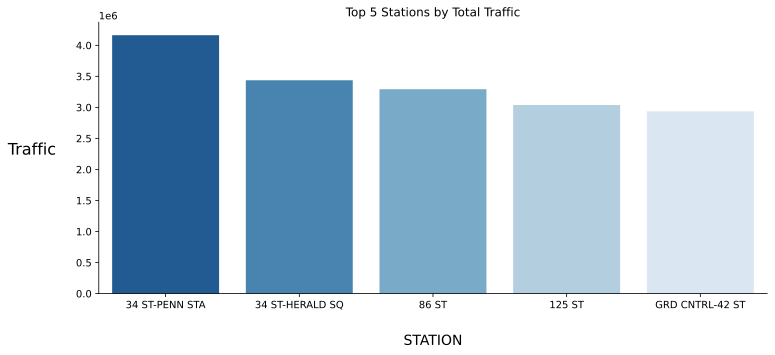

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=most_busiest_stations.index , y= 'TRAFFIC' ,data=most_busiest_stations , ax=ax , palette="Blues_r" )
ax.set_title('Top 5 Stations by Total Traffic')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=16)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [27]:
most_busiest_stations_weekday = mta_entries_exits.groupby(['STATION','WEEKDAY',"WEEKDAY_INDEX"]).agg({'TRAFFIC':'sum'}).reset_index()[["STATION","WEEKDAY","TRAFFIC","WEEKDAY_INDEX"]]

In [28]:
most_busiest_stations_weekday

,STATION,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
0,1 AV,Friday,157564,4
1,1 AV,Monday,128101,0
2,1 AV,Saturday,110708,5
3,1 AV,Sunday,85423,6
4,1 AV,Thursday,149284,3
...,...,...,...,...
2641,ZEREGA AV,Saturday,10442,5
2642,ZEREGA AV,Sunday,7753,6
2643,ZEREGA AV,Thursday,18842,3
2644,ZEREGA AV,Tuesday,18620,1


In [29]:
first_station = most_busiest_stations_weekday [ most_busiest_stations_weekday.loc[: , "STATION"] == "34 ST-PENN STA" ].sort_values("WEEKDAY_INDEX",ascending = True)

In [30]:
first_station

,STATION,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
428,34 ST-PENN STA,Monday,597331,0
432,34 ST-PENN STA,Tuesday,667685,1
433,34 ST-PENN STA,Wednesday,706720,2
431,34 ST-PENN STA,Thursday,722163,3
427,34 ST-PENN STA,Friday,700504,4
429,34 ST-PENN STA,Saturday,435531,5
430,34 ST-PENN STA,Sunday,333057,6


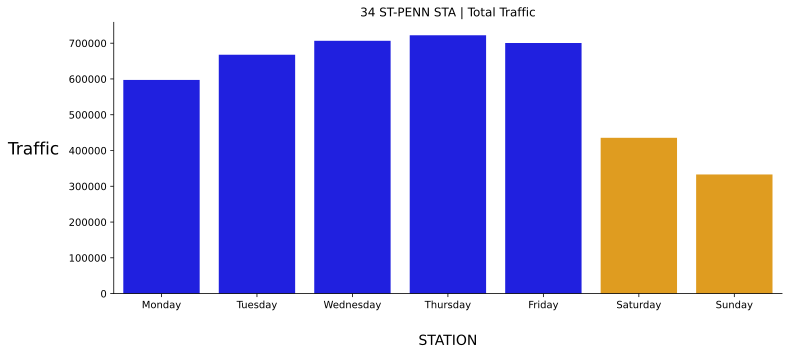

In [31]:
clrs = [ 'orange' if x < 450000 else 'blue' for x in first_station.TRAFFIC.values]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=first_station.WEEKDAY , y= 'TRAFFIC' ,data=first_station , ax=ax ,  palette=clrs)
ax.set_title('34 ST-PENN STA | Total Traffic')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [32]:
second_station = most_busiest_stations_weekday [ most_busiest_stations_weekday.loc[: , "STATION"] == "34 ST-HERALD SQ" ].sort_values("WEEKDAY_INDEX",ascending = True)

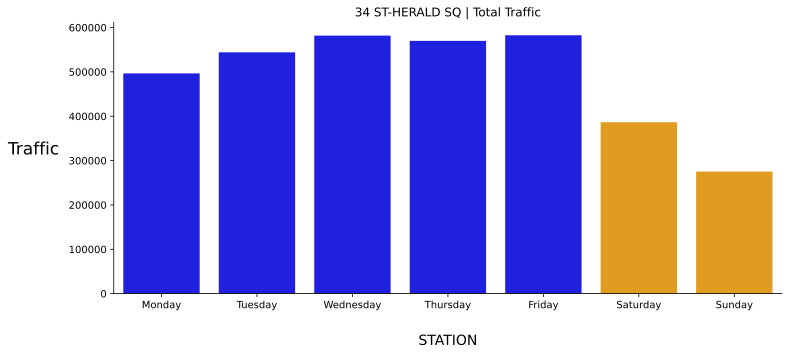

In [33]:
clrs = [ 'orange' if x < 450000 else 'blue' for x in second_station.TRAFFIC.values]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=second_station.WEEKDAY , y= 'TRAFFIC' ,data=second_station , ax=ax ,  palette=clrs)
ax.set_title('34 ST-HERALD SQ | Total Traffic')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [34]:
third_station = most_busiest_stations_weekday [ most_busiest_stations_weekday.loc[: , "STATION"] == "86 ST" ].sort_values("WEEKDAY_INDEX",ascending = True)

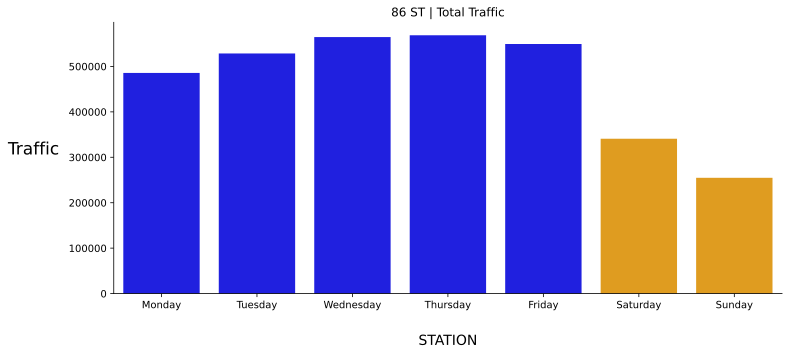

In [35]:
clrs = [ 'orange' if x < 450000 else 'blue' for x in third_station.TRAFFIC.values]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=third_station.WEEKDAY , y= 'TRAFFIC' ,data=third_station , ax=ax ,  palette=clrs)
ax.set_title('86 ST | Total Traffic')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [36]:
fourth_station = most_busiest_stations_weekday [ most_busiest_stations_weekday.loc[: , "STATION"] == "125 ST" ].sort_values("WEEKDAY_INDEX",ascending = True)

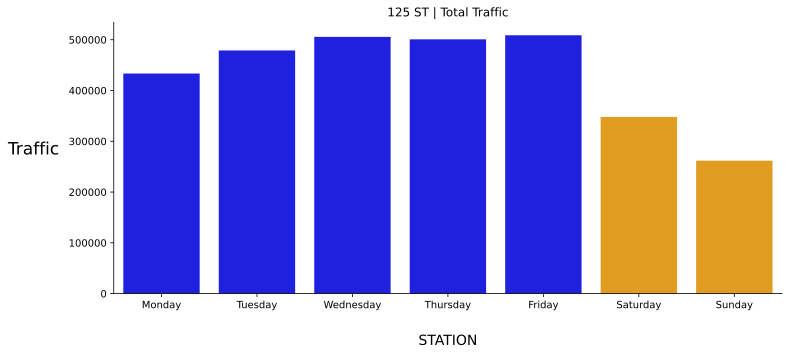

In [37]:
clrs = [ 'orange' if x < 450000 else 'blue' for x in third_station.TRAFFIC.values]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=fourth_station.WEEKDAY , y= 'TRAFFIC' ,data=fourth_station , ax=ax ,  palette=clrs)
ax.set_title('125 ST | Total Traffic')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [38]:
fifth_station = most_busiest_stations_weekday [ most_busiest_stations_weekday.loc[: , "STATION"] == "GRD CNTRL-42 ST" ].sort_values("WEEKDAY_INDEX",ascending = True)

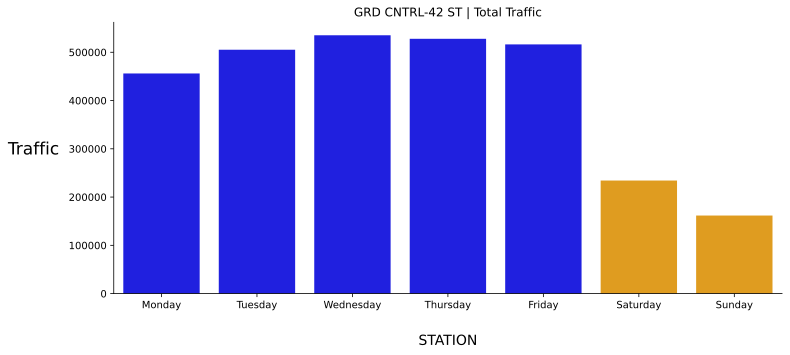

In [39]:
clrs = [ 'orange' if x < 450000 else 'blue' for x in fifth_station.TRAFFIC.values]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=fifth_station.WEEKDAY , y= 'TRAFFIC' ,data=fifth_station , ax=ax ,  palette=clrs)
ax.set_title('GRD CNTRL-42 ST | Total Traffic')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [40]:
total_traffic_by_weekday = mta_entries_exits.groupby(['WEEKDAY',"WEEKDAY_INDEX"]).agg({'TRAFFIC':'sum'}).reset_index()[["WEEKDAY","TRAFFIC","WEEKDAY_INDEX"]].sort_values("WEEKDAY_INDEX" ,ascending =True)

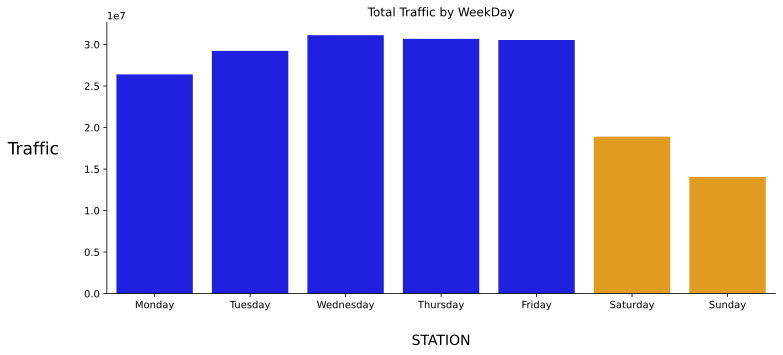

In [41]:
clrs = [ 'orange' if x < 23000000 else 'blue' for x in total_traffic_by_weekday.TRAFFIC.values]
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=total_traffic_by_weekday.WEEKDAY , y= 'TRAFFIC' ,data=total_traffic_by_weekday , ax=ax ,  palette=clrs)
ax.set_title('Total Traffic by WeekDay')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.11,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [42]:
stations = [first_station, second_station, third_station ,fourth_station ,fifth_station]

In [43]:
top5_line_Data = pd.concat(stations)

In [44]:
top5_line_Data

,STATION,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
428,34 ST-PENN STA,Monday,597331,0
432,34 ST-PENN STA,Tuesday,667685,1
433,34 ST-PENN STA,Wednesday,706720,2
431,34 ST-PENN STA,Thursday,722163,3
427,34 ST-PENN STA,Friday,700504,4
429,34 ST-PENN STA,Saturday,435531,5
430,34 ST-PENN STA,Sunday,333057,6
414,34 ST-HERALD SQ,Monday,496585,0
418,34 ST-HERALD SQ,Tuesday,544060,1
419,34 ST-HERALD SQ,Wednesday,581788,2


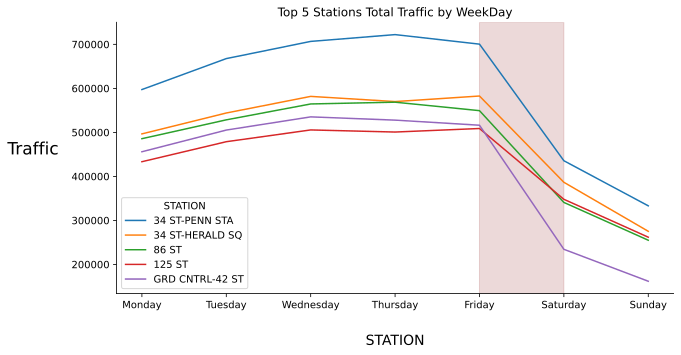

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=top5_line_Data, x="WEEKDAY", y="TRAFFIC", hue="STATION")
ax.axvspan("Friday", "Saturday", alpha=0.15, color='maroon')
ax.set_title('Top 5 Stations Total Traffic by WeekDay')
ax.set_ylabel('Traffic' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.15,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [46]:
pathfile1 = "top20_stations_joined_with_income_data.csv"

In [47]:
top20_stations_median_income = pd.read_csv(pathfile1)

In [48]:
top5_stations_median_income = top20_stations_median_income.loc[[0,1,2,8,10],["STATION","ZIP_CODE","MEDIAN_HOUSEHOLD"]].sort_values("MEDIAN_HOUSEHOLD",ascending =False)

In [49]:
top5_stations_median_income["MEDIAN_HOUSEHOLD"].replace({71245:92840, 102524 :131045 , 110999:143623 , 23302:29799}, inplace=True)

In [50]:
top5_stations_median_income

,STATION,ZIP_CODE,MEDIAN_HOUSEHOLD
8,86 ST,10024,143623
1,GRD CNTRL-42 ST,10017,131045
0,34 ST-PENN STA,10001,92840
2,34 ST-HERALD SQ,10001,92840
10,125 ST,10035,29799


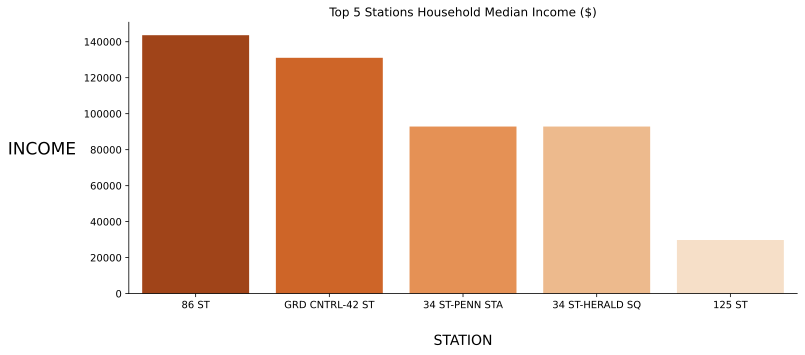

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=top5_stations_median_income.STATION , y= 'MEDIAN_HOUSEHOLD' ,data=top5_stations_median_income , ax=ax , palette="Oranges_r")
ax.set_title('Top 5 Stations Household Median Income ($)')
ax.set_ylabel('INCOME' ,rotation = 0 , fontsize=17)
ax.set_xlabel('STATION',fontsize=14)
ax.yaxis.set_label_coords(-0.13,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [52]:
MasterData.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877,2021-01-02 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930,2021-01-02 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968,2021-01-02 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999,2021-01-02 19:00:00


In [53]:
MasterData['Hourly_entries_diff'] = (MasterData.groupby([ 'CA' , 'UNIT' , 'SCP', 'STATION'])
                                    ['ENTRIES']
                                    .diff(periods=-1)) * -1

MasterData['Hourly_exits_diff'] = (MasterData.groupby(['CA' , 'UNIT' ,  'SCP', 'STATION'])
                                    ['EXITS']
                                    .diff(periods=-1)) * -1

In [54]:
top_5_stations_by_time = MasterData[ 
                                       (MasterData.loc[:,'STATION'] == '86 ST') |
                                       (MasterData.loc[:,'STATION'] == 'GRD CNTRL-42 ST') |
                                       (MasterData.loc[:,'STATION'] == '34 ST-PENN STA') |
                                       (MasterData.loc[:,'STATION'] == '34 ST-HERALD SQ') |
                                       (MasterData.loc[:,'STATION'] == '125 ST') ]

In [55]:
top_5_stations_by_time = top_5_stations_by_time [ (top_5_stations_by_time.loc[: , 'Hourly_entries_diff'] >= 0) & (top_5_stations_by_time.loc[: , 'Hourly_exits_diff'] >= 0) ]

In [56]:
top_5_stations_by_time = top_5_stations_by_time.dropna()

In [57]:
top_5_stations_by_time.isna().sum()

CA                     0
UNIT                   0
SCP                    0
STATION                0
LINENAME               0
DIVISION               0
DATE                   0
TIME                   0
DESC                   0
ENTRIES                0
EXITS                  0
DATETIME               0
Hourly_entries_diff    0
Hourly_exits_diff      0
dtype: int64

In [58]:
top_5_stations_by_time['HOURLY_TOTAL_TRAFFIC'] = top_5_stations_by_time['Hourly_entries_diff'] + top_5_stations_by_time['Hourly_exits_diff']

In [59]:
top_5_stations_by_time.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Hourly_entries_diff,Hourly_exits_diff,HOURLY_TOTAL_TRAFFIC
3313,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,03:00:00,REGULAR,28688662,12101715,2021-01-02 03:00:00,4.0,14.0,18.0
3314,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,07:00:00,REGULAR,28688666,12101729,2021-01-02 07:00:00,59.0,85.0,144.0
3315,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,11:00:00,REGULAR,28688725,12101814,2021-01-02 11:00:00,185.0,307.0,492.0
3316,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,15:00:00,REGULAR,28688910,12102121,2021-01-02 15:00:00,296.0,296.0,592.0
3317,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,19:00:00,REGULAR,28689206,12102417,2021-01-02 19:00:00,155.0,62.0,217.0


In [60]:
top_5_stations_hourly_total_traffic_by_time = top_5_stations_by_time.groupby(['STATION','TIME']).agg({'HOURLY_TOTAL_TRAFFIC':'sum'}).reset_index()

In [61]:
top_5_stations_hourly_total_traffic_by_time["HOURLY_TOTAL_TRAFFIC"].replace({370329.0 : 371585.0 , 
                                                                             359655.0 : 363104.0 , 
                                                                             770828.0 : 777111.0 , 
                                                                             425697.0 : 426467.0 ,
                                                                             246799.0 : 247257.0 ,
                                                                             203761.0 : 205666.0 ,
                                                                             217238.0 : 217852.0 ,
                                                                             350577.0 : 352299.0 ,
                                                                             494601.0 : 495936.0 }, inplace=True)

In [62]:
drop_index = [5 , 6 , 8 ,9 , 18 ,19 ,20 ,21 , 24 ,25 ,32 ,33 ,46 ,48 ,49 , 51 ,52 ,53 ,54 ,55 ,56 ,57 ,59 ,60 ,61 ,72 ,73 ,74 ,77 ,78 ,79 ,80 ,81 ,82 ,83]
top_5_stations_hourly_total_traffic_by_time = top_5_stations_hourly_total_traffic_by_time.drop(drop_index)

In [63]:
top_5_stations_hourly_total_traffic_by_time["TIME"].replace({'01:00:00' : '00:00:00' ,
                                                             '05:00:00' : '04:00:00' ,
                                                             '09:00:00' : '08:00:00' ,
                                                             '13:00:00' : '12:00:00' ,
                                                             '17:00:00' : '16:00:00' ,
                                                             '21:00:00' : '20:00:00'}, inplace=True)

In [64]:
top_5_stations_hourly_total_traffic_by_time["HOURLY_TOTAL_TRAFFIC"].replace({91768.0 :  338462.0 , 
                                                                             340354.0 : 711939.0 , 
                                                                             363104.0 : 792484.0 , 
                                                                             492938.0 : 934381.0 ,
                                                                             210476.0 : 375669.0 ,
                                                                             250357.0 : 552613.0 ,
                                                                             665046.0 : 912303.0 ,
                                                                             653973.0 : 1028568.0 ,
                                                                             982843.0 : 1261771.0 ,
                                                                             361500.0 : 447163.0 ,
                                                                             138899.0 : 237994.0 ,
                                                                             666685.0 : 872351.0 ,
                                                                             578706.0 : 796558.0 ,
                                                                             847211.0 : 1072698.0 ,
                                                                             288505.0 : 357859.0 ,
                                                                             119861.0 : 310672.0 ,
                                                                             395981.0 : 748280.0 ,
                                                                             332291.0 : 662954.0 ,
                                                                             495936.0 : 852053.0 ,
                                                                             159591.0 : 261861.0}, inplace=True)

In [65]:
drop_index = [0 , 2 , 4 , 10 , 12 ,14 , 28 , 30 , 34 , 36 , 38 , 40 ,42 ,44 , 47 , 58 , 63 , 65 , 67 ,69 , 71 , 76 , 85 , 87 ]
top_5_stations_hourly_total_traffic_by_time = top_5_stations_hourly_total_traffic_by_time.drop(drop_index)

In [66]:
top_5_stations_hourly_total_traffic_by_time

,STATION,TIME,HOURLY_TOTAL_TRAFFIC
1,125 ST,03:00:00,338462.0
3,125 ST,07:00:00,711939.0
7,125 ST,11:00:00,792484.0
11,125 ST,15:00:00,934381.0
13,125 ST,19:00:00,375669.0
15,125 ST,23:00:00,46431.0
16,34 ST-HERALD SQ,03:00:00,171729.0
17,34 ST-HERALD SQ,07:00:00,777111.0
22,34 ST-HERALD SQ,11:00:00,785932.0
23,34 ST-HERALD SQ,15:00:00,1191789.0


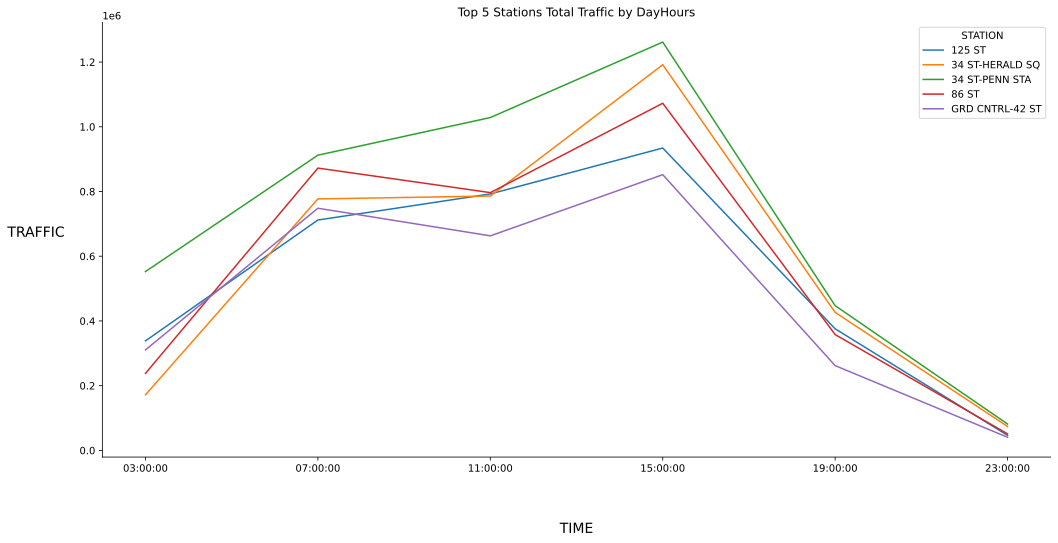

In [67]:
fig, ax = plt.subplots(figsize=(17,8))
sns.lineplot(data=top_5_stations_hourly_total_traffic_by_time, x="TIME", y="HOURLY_TOTAL_TRAFFIC", hue="STATION")
#ax.axvspan("Friday", "Saturday", alpha=0.15, color='maroon')
ax.set_title('Top 5 Stations Total Traffic by DayHours')
ax.set_ylabel('TRAFFIC' ,rotation = 0 , fontsize=14)
ax.set_xlabel('TIME',fontsize=14)
ax.yaxis.set_label_coords(-0.07,0.5)
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [68]:
top_5_stations_hourly_total_traffic_by_time['STATION'] = top_5_stations_hourly_total_traffic_by_time.STATION.astype('category')
top_5_stations_hourly_total_traffic_by_time['TIME'] = top_5_stations_hourly_total_traffic_by_time.TIME.astype('category')

**GRAFİKLERDE Y EKSENİ YAZILARI DİKEY DEĞİL YATAY OLACAK. AYRICA DEĞERLER GÖSTERİLEN Y EKSENİNDE  1e6 yerine M yazmalıyız.**

In [69]:
top_5_stations_hourly_total_traffic_by_time

,STATION,TIME,HOURLY_TOTAL_TRAFFIC
1,125 ST,03:00:00,338462.0
3,125 ST,07:00:00,711939.0
7,125 ST,11:00:00,792484.0
11,125 ST,15:00:00,934381.0
13,125 ST,19:00:00,375669.0
15,125 ST,23:00:00,46431.0
16,34 ST-HERALD SQ,03:00:00,171729.0
17,34 ST-HERALD SQ,07:00:00,777111.0
22,34 ST-HERALD SQ,11:00:00,785932.0
23,34 ST-HERALD SQ,15:00:00,1191789.0


In [70]:
df_heatmap = top_5_stations_hourly_total_traffic_by_time.pivot( "TIME","STATION" , "HOURLY_TOTAL_TRAFFIC")

In [71]:
df_heatmap

STATION,125 ST,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,GRD CNTRL-42 ST
TIME,,,,,
03:00:00,338462.0,171729.0,552613.0,237994.0,310672.0
07:00:00,711939.0,777111.0,912303.0,872351.0,748280.0
11:00:00,792484.0,785932.0,1028568.0,796558.0,662954.0
15:00:00,934381.0,1191789.0,1261771.0,1072698.0,852053.0
19:00:00,375669.0,426467.0,447163.0,357859.0,261861.0
23:00:00,46431.0,73757.0,81397.0,50892.0,40490.0


[Text(0, 0.5, '03:00:00'),
 Text(0, 1.5, '07:00:00'),
 Text(0, 2.5, '11:00:00'),
 Text(0, 3.5, '15:00:00'),
 Text(0, 4.5, '19:00:00'),
 Text(0, 5.5, '23:00:00')]

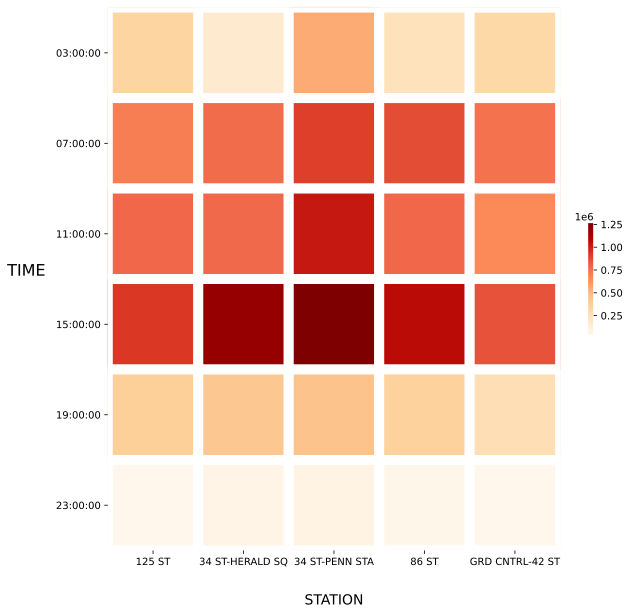

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('TRAFFIC' ,rotation = 0 , fontsize=16)
ax.set_xlabel('TIME',fontsize=14)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5,- 0.08)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

g = sns.heatmap(
    df_heatmap, 
    square=True,
    cbar_kws={'fraction' : 0.01},
    cmap='OrRd',
    linewidth=10 
)

#g.set_xticklabels(df_heatmap.STATION, rotation=45, horizontalalignment='right')
g.set_yticklabels(df_heatmap.index, rotation=0, horizontalalignment='right')